### **Search Engines & Recommender Systems**
#### Calculating Wiki-page tf-idf


By: Nadav Erez

For importing the page from Wikipedia, we use Python's built-in library "wikipedia". As shown below, the user can enter a name of a wikipedia page as he/she likes. We chose the following wiki page:

https://en.wikipedia.org/wiki/The_Dark_Side_of_the_Moon


In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import sys
import math
import re

For loading a wikipedia page, we will use Python's Wikepedia library. 

In [2]:
!pip install wikipedia

In [3]:
import wikipedia

In [4]:
wiki_page = wikipedia.page("The Dark Side of the Moon").content
type(wiki_page)

str

Get rid of punctuation:

In [6]:
wiki_page = re.sub("[^\w\s]", "", wiki_page.rstrip())

Get rid of line breaks:

In [7]:
wiki_page = wiki_page.replace('\n','')

In [12]:
print(wiki_page[0:403]+"...")

The Dark Side of the Moon is the  eighth studio album by the English rock band Pink Floyd released on 1 March 1973 by Harvest Records Primarily developed during live performances the band premiered an early version of the suite several months before recording began The record was conceived as an album that focused on the pressures faced by the band during their arduous lifestyle and dealing with the ...


In [13]:
words = wiki_page.split()

Convert to lowercase:

In [14]:
for i in range(len(words)):
    words[i] = words[i].lower()

We'll get rid of stopwords before we dive into tf-idf calculation.

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\נדב
[nltk_data]     ארז\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [17]:
def remove_stopwords(word_list, stopwords):
    words = []
    for word in word_list: 
        if word not in stopwords:
            words.append(word)
    return words

Let's try it out on a simple sentence:

In [18]:
all_words = ['The', 'moon', 'is', 'big','and','bright','today']
remove_stopwords(all_words, stopwords)

['The', 'moon', 'big', 'bright', 'today']

All stopwords removed. We will apply this on our text:

In [19]:
words = remove_stopwords(words, stopwords)

In [20]:
words_unique = list(set(words))

In [22]:
print(words_unique[0:100])

['temporarily', 'arduous', 'chairman', 'dick', 'member', 'conflict', 'soulful', 'final', 'suggesting', 'critics', 'humanity', 'damage', 'ranked', 'consoles', 'van', 'allstars', 'jockeys', 'instructed', 'mad', 'let', 'geesin', 'proportions', 'soundscan', 'denoting', 'flesh', 'greater', 'fun', 'already', 'segue', 'wealth', 'elements', 'exuberance', 'stereo', 'loose', 'huge', 'night', '736', 'new', '30th', 'shifting', 'make', 'david', 'cd', 'part', 'whats', 'listing', 'mixes', 'western', 'interesting', 'dvdvideo', 'absolutely', 'denied', 'roy', 'zabriskie', 'recommend', 'remasters', 'relatively', 'roadie', 'allowed', 'stating', 'engineer', 'dimensions', 'mocks', 'last', 'another', 'maben', 'match', 'quietly', 'totalled', 'conceptual', 'songs', 'floyddavid', 'tracks', 'fact', 'april', 'microphone', 'saying', 'sounds', 'website', 'head', 'coins', 'hear', 'disappointed', 'odriscoll', 'exactly', 'grossman', '2014', 'wale', 'able', 'take', 'didntpart', 'shared', 'python', 'premiered', 'greed',

Read Wikipedia idfs file:

In [19]:
idfs = pd.read_csv('wiki_tfidf_terms - small.csv')
# Dataset is now stored in a Pandas Dataframe

In [20]:
idfs.head()

,token,idf
0,the,0.093074
1,in,0.134821
2,a,0.144706
3,of,0.181108
4,is,0.252126


####  (2.1) Term Frequency - TF

Count occurrences of term:

In [21]:
word_dict = dict.fromkeys(words_unique,0)

In [22]:
for word in words:
    word_dict[word]+=1

In [23]:
import itertools
print(str(dict(itertools.islice(word_dict.items(), 20)))) 

{'antique': 1, 'aksnick': 1, 'faintly': 1, 'thorgersonthe': 1, 'elevation': 1, 'remember': 3, '1716': 1, 'blue': 1, 'accompanied': 1, 'hardie': 2, 'wikiquotethe': 1, 'function': 1, 'lengthy': 1, 'flew': 1, '25': 3, 'columbia': 2, 'come': 2, 'acts': 1, 'roger': 7, '6000': 1}


Function for computing term frequency:

*We use document length for normalization.

In [24]:
def computeTF(word_dict, words):
    tf = {}
    docLength = len(words)
    for word, count in word_dict.items():
        tf[word] = count/float(docLength)
    return tf

In [25]:
tf = computeTF(word_dict, words)

In [26]:
print(str(dict(itertools.islice(tf.items(), 20))))

{'antique': 0.0002577319587628866, 'aksnick': 0.0002577319587628866, 'faintly': 0.0002577319587628866, 'thorgersonthe': 0.0002577319587628866, 'elevation': 0.0002577319587628866, 'remember': 0.0007731958762886598, '1716': 0.0002577319587628866, 'blue': 0.0002577319587628866, 'accompanied': 0.0002577319587628866, 'hardie': 0.0005154639175257732, 'wikiquotethe': 0.0002577319587628866, 'function': 0.0002577319587628866, 'lengthy': 0.0002577319587628866, 'flew': 0.0002577319587628866, '25': 0.0007731958762886598, 'columbia': 0.0005154639175257732, 'come': 0.0005154639175257732, 'acts': 0.0002577319587628866, 'roger': 0.0018041237113402063, '6000': 0.0002577319587628866}


In [27]:
dict(sorted(tf.items(), key=operator.itemgetter(1), reverse=True)[:15])

{'album': 0.022938144329896906,
 'side': 0.016494845360824743,
 'dark': 0.013144329896907217,
 'moon': 0.01134020618556701,
 'band': 0.010824742268041237,
 'albums': 0.007989690721649484,
 'time': 0.007474226804123712,
 'pink': 0.007216494845360825,
 'waters': 0.006185567010309278,
 'us': 0.006185567010309278,
 'floyd': 0.005154639175257732,
 'music': 0.004896907216494845,
 'released': 0.004896907216494845,
 'recording': 0.004381443298969072,
 'one': 0.004123711340206186}

#### (2.2) Inverse Document Frequency - IDF

(Please note - this block of code has a relatively long runtime)

In [28]:
idf = {}
tokens = idfs["token"].tolist()
iter=0
for word in words_unique:
  if word in tokens:
    idf[words_unique[iter]] = idfs[idfs["token"]==word].iloc[0]['idf']
  iter=iter+1

In [29]:
dict(sorted(idf.items(), key=operator.itemgetter(1), reverse=True)[:15])

{'guthries': 12.17159457,
 'parrys': 12.10907421,
 'crossfades': 12.07922124,
 'nonmusical': 11.99466386,
 'jamrock': 11.94202012,
 'mccartneys': 11.71376147,
 'echoey': 11.65433805,
 'maben': 11.63528986,
 'theres': 11.5625305,
 'onon': 11.5625305,
 'geesin': 11.51123721,
 'everpresent': 11.44669869,
 'synthi': 11.40088915,
 'clinking': 11.35708653,
 'floyds': 11.32891565}

In [30]:
len(idf)

1690

In [31]:
tf_df = pd.DataFrame(tf,index=[0]).transpose().reset_index()
idf_df = pd.DataFrame(idf,index=[0]).transpose().reset_index()

In [32]:
tf_df.rename(columns = {'index':'Term', 0:'TF'}, inplace = True)
idf_df.rename(columns = {'index':'Term', 0:'IDF'}, inplace = True)

In [33]:
tf_idf = pd.merge(tf_df, idf_df, on='Term')

#### (2.3) TF-IDF

In [34]:
tf_idf["TF*IDF"] = tf_idf.TF * tf_idf.IDF

In [35]:
tf_idf.head()

,Term,TF,IDF,TF*IDF
0,antique,0.000258,6.482435,0.001671
1,faintly,0.000258,8.026925,0.002069
2,elevation,0.000258,4.663214,0.001202
3,remember,0.000773,5.423365,0.004193
4,1716,0.000258,7.350273,0.001894


Wordclouds:

In [85]:
!pip install wordcloud

In [36]:
from wordcloud import WordCloud

In [37]:
max_15_tf = tf_idf.sort_values('TF',ascending = False).head(15)

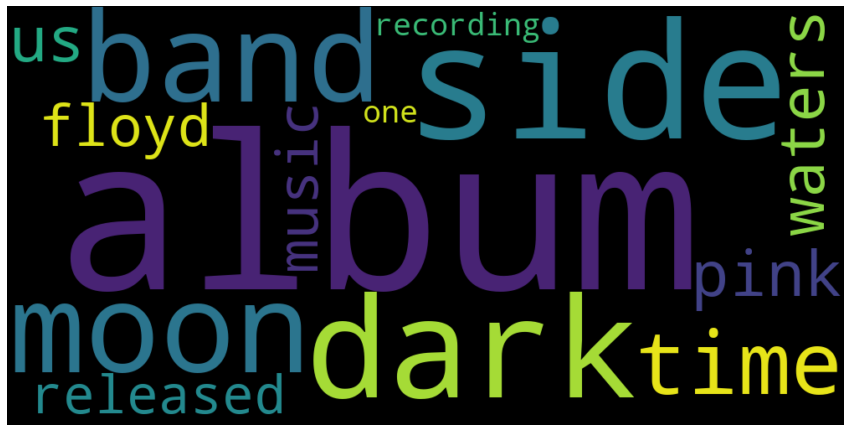

In [38]:
unique_string=" ".join(max_15_tf['Term'])
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()
plt.close()

In [39]:
max_15_idf = tf_idf.sort_values('IDF',ascending = False).head(15)

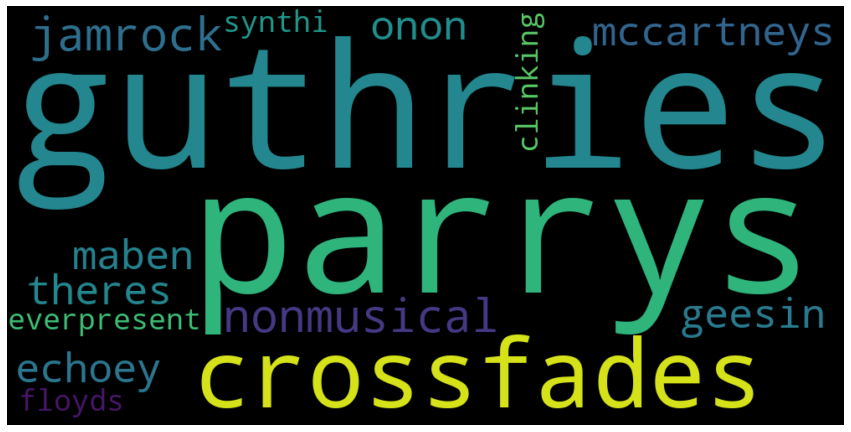

In [40]:
unique_string=" ".join(max_15_idf['Term'])
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()
plt.close()

In [41]:
max_15_tf_idf = tf_idf.sort_values('TF*IDF',ascending = False).head(15)

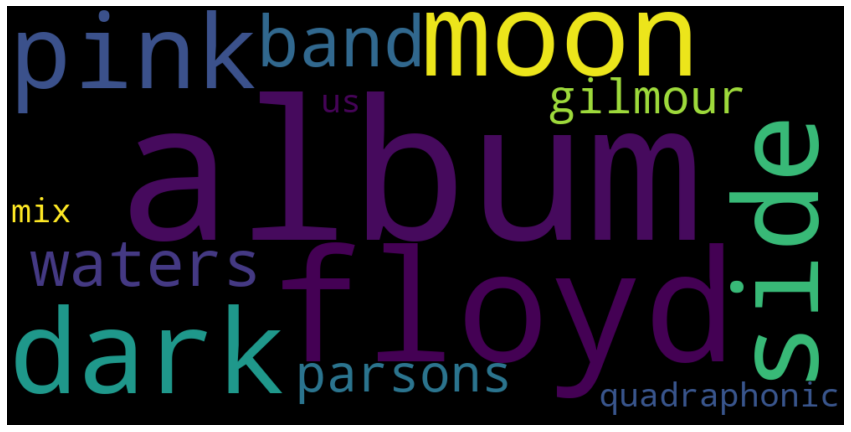

In [42]:
unique_string=" ".join(max_15_tf_idf['Term'])
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()
plt.close()

#### TF - different normalization method

We will calculate TF again, this time changing the normalization by substituting **document length** by **frequent word in document**. 

In [43]:
def newTF(word_dict):
    tf = {}
    highest_freq_term = max(word_dict.values())
    for word, count in word_dict.items():
        tf[word] = count/float(highest_freq_term)
    return tf

In [44]:
tf = newTF(word_dict)

In [45]:
dict(sorted(tf.items(), key=operator.itemgetter(1), reverse=True)[:15])

{'album': 1.0,
 'side': 0.7191011235955056,
 'dark': 0.5730337078651685,
 'moon': 0.4943820224719101,
 'band': 0.47191011235955055,
 'albums': 0.34831460674157305,
 'time': 0.3258426966292135,
 'pink': 0.3146067415730337,
 'waters': 0.2696629213483146,
 'us': 0.2696629213483146,
 'floyd': 0.2247191011235955,
 'music': 0.21348314606741572,
 'released': 0.21348314606741572,
 'recording': 0.19101123595505617,
 'one': 0.1797752808988764}

In [46]:
new_tf_df = pd.DataFrame(tf,index=[0]).transpose().reset_index()
new_idf_df = pd.DataFrame(idf,index=[0]).transpose().reset_index()

In [47]:
new_tf_df.rename(columns = {'index':'Term', 0:'TF'}, inplace = True)
new_idf_df.rename(columns = {'index':'Term', 0:'IDF'}, inplace = True)

In [48]:
new_tf_idf = pd.merge(new_tf_df, new_idf_df, on='Term')

In [49]:
new_tf_idf["TF*IDF"] = new_tf_idf.TF * new_tf_idf.IDF

In [50]:
new_tf_idf.head()

,Term,TF,IDF,TF*IDF
0,antique,0.011236,6.482435,0.072836
1,faintly,0.011236,8.026925,0.090190
2,elevation,0.011236,4.663214,0.052396
3,remember,0.033708,5.423365,0.182810
4,1716,0.011236,7.350273,0.082587


In [51]:
max_15_new_tf_idf = new_tf_idf.sort_values('TF*IDF',ascending = False).head(15)

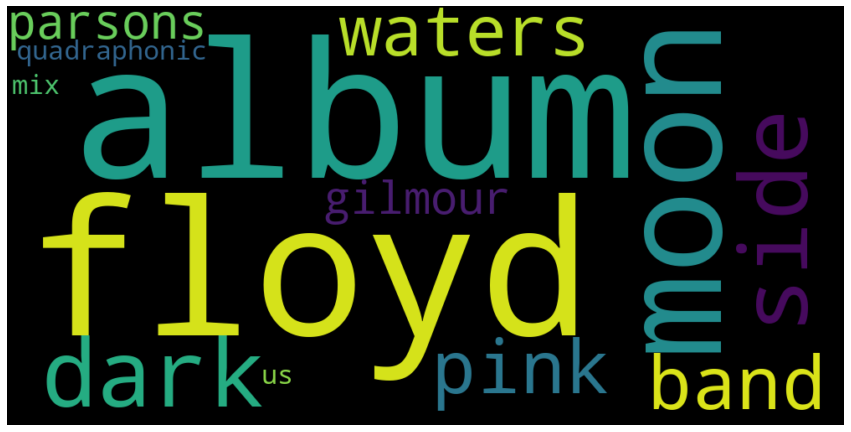

In [52]:
unique_string=" ".join(max_15_new_tf_idf['Term'])
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()
plt.close()

The results are basically the same. 